# 3 &emsp; Advanced Case Study: Exploring Repair and Reuse

## 3.1 &emsp; Load Packages and Setup Path

In [1]:
import os
from pathlib import Path
import PV_ICE
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 5)

ModuleNotFoundError: No module named 'PV_ICE'

In [2]:
testfolder = str(Path().resolve() / 'TEMP') # Path to the simulation folder.

baselinefolder = str(Path().resolve().parent.parent.parent / 'PV_ICE' / 'baselines')  # Path to baselines and data.

print ("Your simulation will be stored in %s" % testfolder)
print ("Your baselines are stored in %s" % baselinefolder)

Your simulation will be stored in /Users/mmendez/Documents/Postdoc/Software_dev/PV_ICE/docs/tutorials/tutorials_v2/TEMP
Your baselines are stored in /Users/mmendez/Documents/Postdoc/Software_dev/PV_ICE/PV_ICE/baselines


## 3.2 &emsp; Repair Simulation

In [3]:
r3 = PV_ICE.Simulation(name='Simulation_3', path=testfolder)
r3.createScenario(name='Repair_0', file=baselinefolder + '/baseline_modules_US.csv')
r3.scenario['Repair_0'].addMaterial('glass', file=baselinefolder + '/baseline_material_glass.csv')
r3.scenario['Repair_0'].addMaterial('silicon', file=baselinefolder + '/baseline_material_silicon.csv')

r3.createScenario(name='Repair_50', file=baselinefolder + '/baseline_modules_US.csv')
r3.scenario['Repair_50'].addMaterial('glass', file=baselinefolder + '/baseline_material_glass.csv')
r3.scenario['Repair_50'].addMaterial('silicon', file=baselinefolder + '/baseline_material_silicon.csv')


path = /Users/mmendez/Documents/Postdoc/Software_dev/PV_ICE/docs/tutorials/tutorials_v2/TEMP


In [4]:
r3.scenario['Repair_0'].data['mod_Repair'] = 0
r3.scenario['Repair_50'].data['mod_Repair'] = 50

r3.scenario['Repair_0'].data['mod_reliability_t50'] = 25
r3.scenario['Repair_0'].data['mod_reliability_t90'] = 35
r3.scenario['Repair_50'].data['mod_reliability_t50'] = 25
r3.scenario['Repair_50'].data['mod_reliability_t90'] = 35

# Setting Project Lifetime beyond Failures
r3.scenario['Repair_0'].data['mod_lifetime'] = 50
r3.scenario['Repair_50'].data['mod_lifetime'] = 50

In [5]:
r3.calculateMassFlow()

Working on Scenario:  Repair_0
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  Repair_50
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon


In [6]:
r3.scenario['Repair_0'].data.keys()

Index(['year', 'new_Installed_Capacity_[MW]', 'mod_eff', 'mod_reliability_t50',
       'mod_reliability_t90', 'mod_degradation', 'mod_lifetime', 'mod_MFG_eff',
       'mod_Repair', 'mod_MerchantTail',
       ...
       'PB1_landfill', 'PB2_stored', 'PB3_reMFG', 'PB3_reMFG_yield',
       'PB3_reMFG_unyield', 'PB4_recycled', 'P2_stored', 'P3_reMFG',
       'P4_recycled', 'ModuleTotal_MFG'],
      dtype='object', length=231)

In [7]:
AREA = r3.scenario['Repair_0'].data['Area'].iloc[0] ## Why?
AREA

100000.0

In [153]:
filter_col = [col for col in r3.scenario['Repair_0'].data if col.startswith('EOL_L0_Year')]
filter_col

['EOL_L0_Year_0',
 'EOL_L0_Year_1',
 'EOL_L0_Year_2',
 'EOL_L0_Year_3',
 'EOL_L0_Year_4',
 'EOL_L0_Year_5',
 'EOL_L0_Year_6',
 'EOL_L0_Year_7',
 'EOL_L0_Year_8',
 'EOL_L0_Year_9',
 'EOL_L0_Year_10',
 'EOL_L0_Year_11',
 'EOL_L0_Year_12',
 'EOL_L0_Year_13',
 'EOL_L0_Year_14',
 'EOL_L0_Year_15',
 'EOL_L0_Year_16',
 'EOL_L0_Year_17',
 'EOL_L0_Year_18',
 'EOL_L0_Year_19',
 'EOL_L0_Year_20',
 'EOL_L0_Year_21',
 'EOL_L0_Year_22',
 'EOL_L0_Year_23',
 'EOL_L0_Year_24',
 'EOL_L0_Year_25',
 'EOL_L0_Year_26',
 'EOL_L0_Year_27',
 'EOL_L0_Year_28',
 'EOL_L0_Year_29',
 'EOL_L0_Year_30',
 'EOL_L0_Year_31',
 'EOL_L0_Year_32',
 'EOL_L0_Year_33',
 'EOL_L0_Year_34',
 'EOL_L0_Year_35',
 'EOL_L0_Year_36',
 'EOL_L0_Year_37',
 'EOL_L0_Year_38',
 'EOL_L0_Year_39',
 'EOL_L0_Year_40',
 'EOL_L0_Year_41',
 'EOL_L0_Year_42',
 'EOL_L0_Year_43',
 'EOL_L0_Year_44',
 'EOL_L0_Year_45',
 'EOL_L0_Year_46',
 'EOL_L0_Year_47',
 'EOL_L0_Year_48',
 'EOL_L0_Year_49',
 'EOL_L0_Year_50',
 'EOL_L0_Year_51',
 'EOL_L0_Year_52',
 'E

In [1]:
list = ['EOL_L0_Year_0',
 'EOL_L0_Year_1',
 'EOL_L0_Year_2',
 'EOL_L0_Year_3',
 'EOL_L0_Year_4',
 'EOL_L0_Year_5',
 'EOL_L0_Year_6',
 'EOL_L0_Year_7',
 'EOL_L0_Year_8',
 'EOL_L0_Year_9',
 'EOL_L0_Year_10',
 'EOL_L0_Year_11',
 'EOL_L0_Year_12',
 'EOL_L0_Year_13',
 'EOL_L0_Year_14',
 'EOL_L0_Year_15',
 'EOL_L0_Year_16',
 'EOL_L0_Year_17',
 'EOL_L0_Year_18',
 'EOL_L0_Year_19',
 'EOL_L0_Year_20',
 'EOL_L0_Year_21',
 'EOL_L0_Year_22',
 'EOL_L0_Year_23',
 'EOL_L0_Year_24',
 'EOL_L0_Year_25',
 'EOL_L0_Year_26',
 'EOL_L0_Year_27',
 'EOL_L0_Year_28',
 'EOL_L0_Year_29',
 'EOL_L0_Year_30',
 'EOL_L0_Year_31',
 'EOL_L0_Year_32',
 'EOL_L0_Year_33',
 'EOL_L0_Year_34',
 'EOL_L0_Year_35',
 'EOL_L0_Year_36',
 'EOL_L0_Year_37',
 'EOL_L0_Year_38',
 'EOL_L0_Year_39',
 'EOL_L0_Year_40',
 'EOL_L0_Year_41',
 'EOL_L0_Year_42',
 'EOL_L0_Year_43',
 'EOL_L0_Year_44',
 'EOL_L0_Year_45',
 'EOL_L0_Year_46',
 'EOL_L0_Year_47',
 'EOL_L0_Year_48',
 'EOL_L0_Year_49',
 'EOL_L0_Year_50',
 'EOL_L0_Year_51',
 'EOL_L0_Year_52',
 'EOL_L0_Year_53',
 'EOL_L0_Year_54',
 'EOL_L0_Year_55']

In [4]:
list[0]

'EOL_L0_Year_0'

In [121]:
Cumul_EOL_R0 = []
Cumul_EOL_R50 = []

foo=0
foo2=0
for life in range (0, len(filter_col)):
    foo +=  r3.scenario['Repair_0'].data[filter_col[life]].iloc[0]
    foo2 += r3.scenario['Repair_50'].data[filter_col[life]].iloc[0]
    Cumul_EOL_R0.append(foo)
    Cumul_EOL_R50.append(foo2)

(0.0, 45.0)

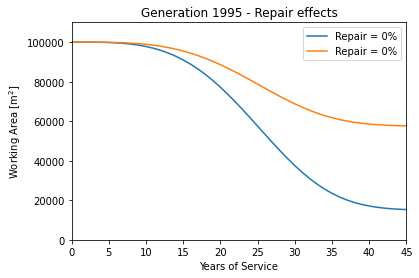

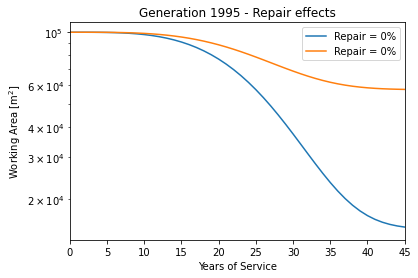

In [122]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(AREA-Cumul_EOL_R0, label='Repair = 0%')
plt.plot(AREA-Cumul_EOL_R50, label='Repair = 0%')
plt.ylabel('Working Area [m$^2$]')
plt.xlabel('Years of Service')
plt.title('Generation 1995 - Repair effects')
plt.legend()
plt.xlim([0,45])
plt.ylim([0,109999]) # Added a y limit because the plot goes from -200000 to 100000 for some reason


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(AREA-Cumul_EOL_R0, label='Repair = 0%')
plt.plot(AREA-Cumul_EOL_R50, label='Repair = 0%')
ax.set_yscale('log')
plt.ylabel('Working Area [m$^2$]')
plt.xlabel('Years of Service')
plt.title('Generation 1995 - Repair effects')
plt.legend()
plt.xlim([0,45])



(0.0, 45.0)

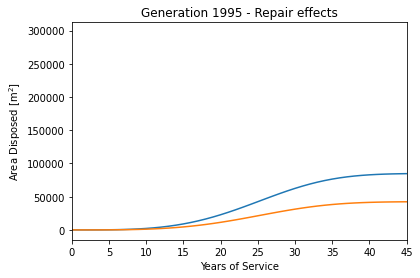

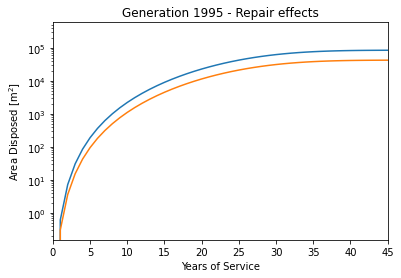

In [123]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(Cumul_EOL_R0)
plt.plot(Cumul_EOL_R50)
plt.ylabel('Area Disposed [m$^2$]')
plt.xlabel('Years of Service')
plt.title('Generation 1995 - Repair effects')
plt.xlim([0,45])

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(Cumul_EOL_R0)
plt.plot(Cumul_EOL_R50)
ax.set_yscale('log')
plt.ylabel('Area Disposed [m$^2$]')
plt.xlabel('Years of Service')
plt.title('Generation 1995 - Repair effects')
plt.xlim([0,45])

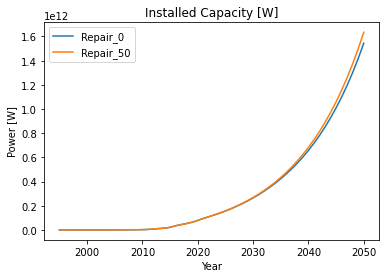

In [124]:
r3.plotScenariosComparison(keyword='Installed_Capacity_[W]')

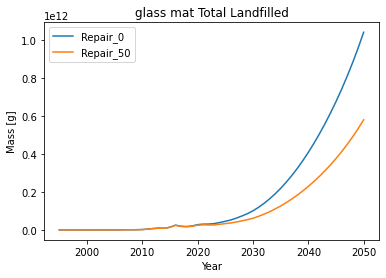

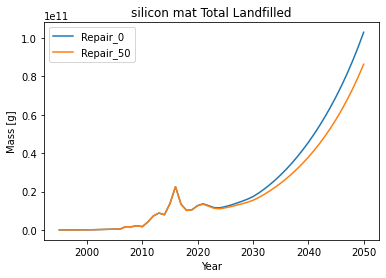

In [125]:
r3.plotMaterialComparisonAcrossScenarios(material='glass', keyword='mat_Total_Landfilled')
r3.plotMaterialComparisonAcrossScenarios(material='silicon', keyword='mat_Total_Landfilled')

## 3.3 &emsp; Reuse Simulation

Starting a lean simulation

In [126]:
r3_2 = PV_ICE.Simulation(name='Simulation_3_2', path=testfolder)
r3_2.createScenario(name='Reuse_0', file=baselinefolder + '/baseline_modules_US.csv')
r3_2.scenario['Reuse_0'].addMaterial('glass', file=baselinefolder + '/baseline_material_glass.csv')
r3_2.scenario['Reuse_0'].addMaterial('silicon', file=baselinefolder + '/baseline_material_silicon.csv')

r3_2.createScenario(name='Reuse_50', file= baselinefolder + '/baseline_modules_US.csv')
r3_2.scenario['Reuse_50'].addMaterial('glass', file= baselinefolder + '/baseline_material_glass.csv')
r3_2.scenario['Reuse_50'].addMaterial('silicon', file= baselinefolder + '/baseline_material_silicon.csv')



path = /Users/mmendez/Documents/Postdoc/Software_dev/PV_ICE/docs/tutorials/tutorials_v2/TEMP


In [127]:
r3_2.scenario['Reuse_0'].data['mod_Reuse'] = 0
r3_2.scenario['Reuse_50'].data['mod_Reuse'] = 50
r3_2.scenario['Reuse_50'].data['mod_Reuse'] = 50

r3_2.scenario['Reuse_0'].data['mod_reliability_t50'] = 35
r3_2.scenario['Reuse_0'].data['mod_reliability_t90'] = 45
r3_2.scenario['Reuse_50'].data['mod_reliability_t50'] = 35
r3_2.scenario['Reuse_50'].data['mod_reliability_t90'] = 45

# Setting Project Lifetime beyond Failures
r3_2.scenario['Reuse_0'].data['mod_lifetime'] = 25
r3_2.scenario['Reuse_50'].data['mod_lifetime'] = 25

In [128]:
r3_2.calculateMassFlow()

Working on Scenario:  Reuse_0
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon
Working on Scenario:  Reuse_50
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  silicon


In [129]:
r3_2.scenario['Reuse_50'].data.keys()

Index(['year', 'new_Installed_Capacity_[MW]', 'mod_eff', 'mod_reliability_t50',
       'mod_reliability_t90', 'mod_degradation', 'mod_lifetime', 'mod_MFG_eff',
       'mod_Repair', 'mod_MerchantTail',
       ...
       'PB1_landfill', 'PB2_stored', 'PB3_reMFG', 'PB3_reMFG_yield',
       'PB3_reMFG_unyield', 'PB4_recycled', 'P2_stored', 'P3_reMFG',
       'P4_recycled', 'ModuleTotal_MFG'],
      dtype='object', length=232)

In [130]:
AREA = r3_2.scenario['Reuse_50'].data['Area'].iloc[0]

In [131]:
filter_col = [col for col in r3_2.scenario['Reuse_50'].data if col.startswith('EOL_PG_Year_')] # EOL_on_Year_... no longer used, options EOL_L0_Year ..., EOL_PG_Year..., and EOL_BS_Year..

In [132]:
Cumul_EOL_R0 = []
Cumul_EOL_R50 = []

foo=0
foo2=0
for life in range (0, len(filter_col)):
    foo +=  r3_2.scenario['Reuse_0'].data[filter_col[life]].iloc[0]
    foo2 += r3_2.scenario['Reuse_50'].data[filter_col[life]].iloc[0]
    Cumul_EOL_R0.append(foo)
    Cumul_EOL_R50.append(foo2)

(0.0, 45.0)

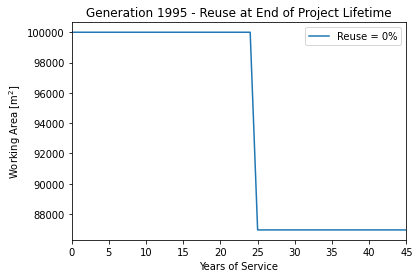

In [133]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(AREA-Cumul_EOL_R0, label='Reuse = 0%')
#plt.plot(AREA-Cumul_EOL_R50, label='Reuse = 50%')
plt.ylabel('Working Area [m$^2$]')
plt.xlabel('Years of Service')
plt.title('Generation 1995 - Reuse at End of Project Lifetime')
plt.legend()
plt.xlim([0,45])

In [134]:
import seaborn as sns


(0.0, 45.0)

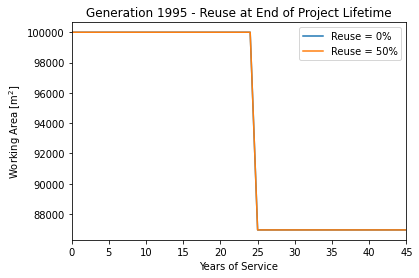

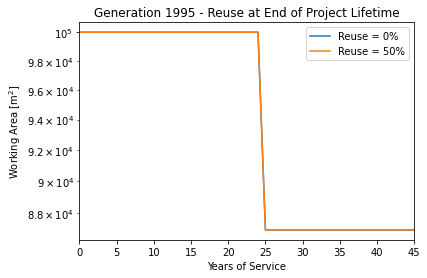

In [135]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(AREA-Cumul_EOL_R0, label='Reuse = 0%')
plt.plot(AREA-Cumul_EOL_R50, label='Reuse = 50%')
plt.ylabel('Working Area [m$^2$]')
plt.xlabel('Years of Service')
plt.title('Generation 1995 - Reuse at End of Project Lifetime')
plt.legend()
plt.xlim([0,45])

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(AREA-Cumul_EOL_R0, label='Reuse = 0%')
plt.plot(AREA-Cumul_EOL_R50, label='Reuse = 50%')
plt.legend()
ax.set_yscale('log')
plt.ylabel('Working Area [m$^2$]')
plt.xlabel('Years of Service')
plt.title('Generation 1995 - Reuse at End of Project Lifetime')
plt.xlim([0,45])



(0.0, 45.0)

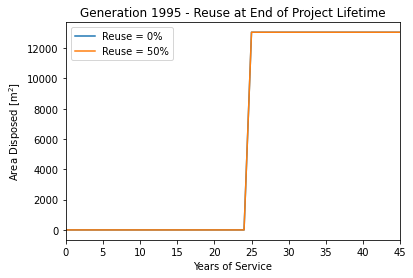

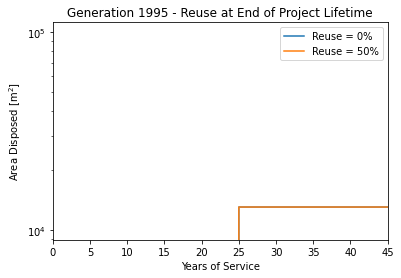

In [141]:


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(Cumul_EOL_R0, label='Reuse = 0%')
plt.plot(Cumul_EOL_R50, label='Reuse = 50%')
plt.ylabel('Area Disposed [m$^2$]')
plt.xlabel('Years of Service')
plt.title('Generation 1995 - Reuse at End of Project Lifetime')
plt.legend()
plt.xlim([0,45])

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot(Cumul_EOL_R0, label='Reuse = 0%')
plt.plot(Cumul_EOL_R50, label='Reuse = 50%')
ax.set_yscale('log')
plt.ylabel('Area Disposed [m$^2$]')
plt.xlabel('Years of Service')
plt.title('Generation 1995 - Reuse at End of Project Lifetime')
plt.legend()
plt.xlim([0,45])

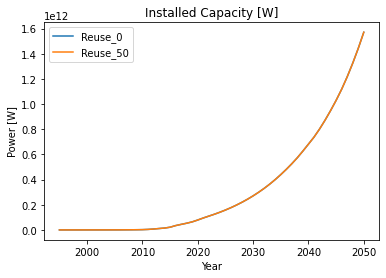

In [142]:


r3_2.plotScenariosComparison(keyword='Installed_Capacity_[W]')



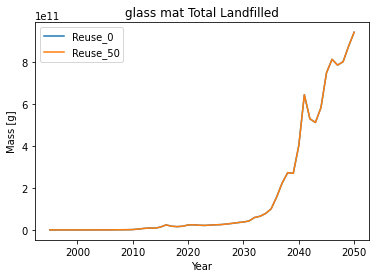

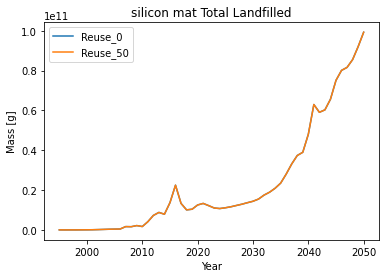

In [143]:


r3_2.plotMaterialComparisonAcrossScenarios(material='glass', keyword='mat_Total_Landfilled')
r3_2.plotMaterialComparisonAcrossScenarios(material='silicon', keyword='mat_Total_Landfilled')



All plots are the same.... why? This tutorial could use some explanation for the user :)